In [1]:
######################################################################
# Semi-Supervised Classification of Graph Nodes using Exponential Decay
# L42: Assessment 2
# Jan Ondras (jo356), Trinity College
######################################################################
# Show contributions of features from other nodes
#############################################################################################################
# Load original feature set
#############################################################################################################
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import time
from gcn.utils import *

dataset_type = 'cora'
# Load data
adj, org_features, _, _, _, _, _, _ = load_data(dataset_type)
org_features = org_features.toarray()
# Get graph of the network
G = nx.from_scipy_sparse_matrix(adj)
all_SP_lengths = dict(nx.all_pairs_shortest_path_length(G))

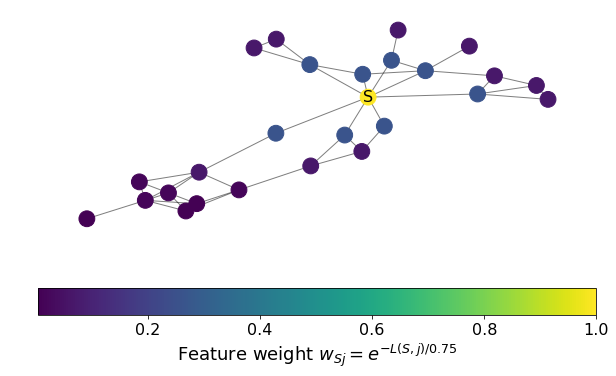

In [44]:
#############################################################################################################
# Show contributions of features from other nodes
#############################################################################################################
# LAMBDA -> 0         => all nodes have same features as originally
# LAMBDA = np.inf     => all nodes have same features
#############################################################################################################
import matplotlib

LAMBDA = 0.75

SOURCE = 2160 # node of interest: 400, 5 or 123, 20, or 145best
MAX_PATH_LEN = 5 # maximum path length to show (from SOURCE)

subG = nx.ego_graph(G, SOURCE, radius=MAX_PATH_LEN)

weights = []
for n in subG.nodes:
    
    length = all_SP_lengths[SOURCE][n]
    weights.append( np.exp(-float(length)/LAMBDA) )

vmin =  min(weights) # or just 0.
vmax = 1.
cmap = plt.cm.viridis

plt.figure(figsize=(10,6))
pos = nx.spring_layout(subG, iterations=200)
nx.draw_networkx_edges(subG, pos, alpha=0.5)
nx.draw_networkx_nodes(subG, pos, nodelist=subG.nodes,
                       node_size=250,
                       node_color=weights,
                       cmap=cmap, vmin=vmin, vmax=vmax)
# nx.draw_networkx_nodes(subG, pos, nodelist=[SOURCE],
#                        node_size=500, node_shape='s'#,with_labels=True,
#                        #node_color=(0,0,256)
# #                        labels=['Source']
#                       )
nx.draw_networkx_labels(subG, pos, labels={SOURCE: 'S'} ,font_size=16)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm,  orientation="horizontal") # label='Feature weight $w_i$',
cbar.ax.tick_params(labelsize=16)
cbar.set_label(r'Feature weight $w_{Sj} = e^{- L(S,j) / 0.75}$', fontsize=18) # \frac{L(i,j)}{a}
plt.axis('off')
plt.show()

3 Counter({2: 10, 1: 8, 3: 4, 4: 3, 0: 1})
5 = 5


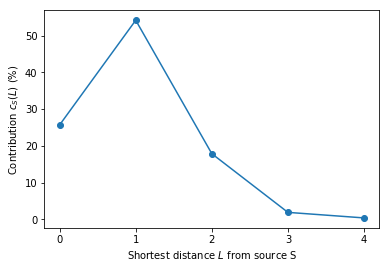

Contribution to node S's features from all nodes at a particular distance from source


In [47]:
#############################################################################################################
# Contribution of nodes distant k hops, ie weighted by numbers of nodes at a certain distance
#############################################################################################################
from collections import Counter

LAMBDA = 0.75
SOURCE = 2160 # node of interest: 400, 5 or 123, 20, or 145best

cnts = Counter( all_SP_lengths[SOURCE].values() ) # count number N_k=cnts[k] of nodes distant k from SOURCE
print cnts[4], cnts

MAX_N_NODES_PATH = np.max(cnts.keys()) + 1 # including source
print MAX_N_NODES_PATH, "=", len(cnts)     # should be equal
x = np.arange(MAX_N_NODES_PATH)

contribs = [] # contributions from nodes at cetain distances
for k in x:
    contribs.append(  cnts[k] * np.exp(-float(k)/LAMBDA) )
        
W = np.sum(contribs) # normalizing constant, sum of N_k*w_k = N_k*np.exp(-float(k)/LAMBDA)
contribs = np.array(contribs) / W

plt.figure()
plt.plot(x, 100. * contribs, 'o-')
plt.xticks(x,x)
plt.xlabel('Shortest distance $L$ from source S')
plt.ylabel("Contribution $c_{S} (L)$ (%)")
plt.show()
print "Contribution to node S's features from all nodes at a particular distance from source"

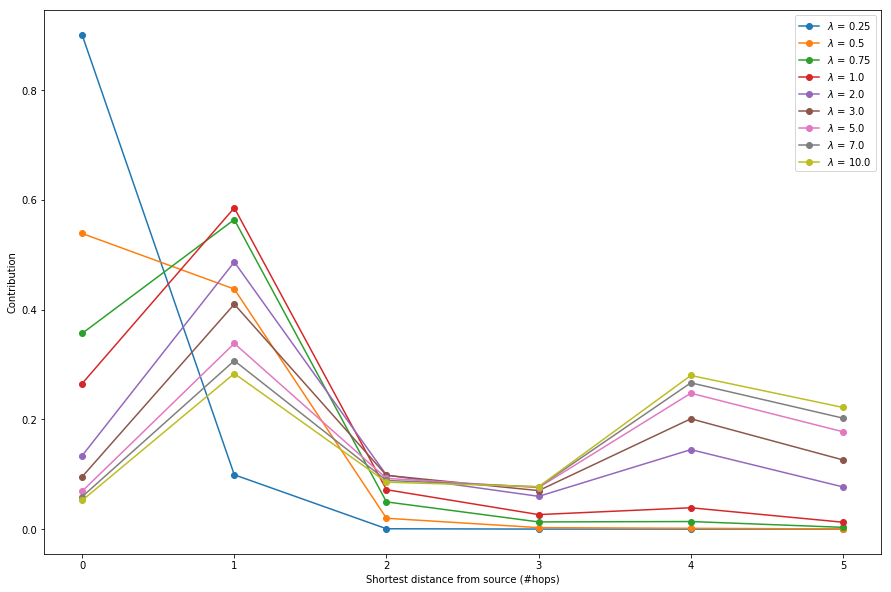

Contribution to source's features from all nodes at a particular distance from source


In [4]:
# As above but for various lambdas

lambdas = [0.25, 0.5, 0.75, 1.,2.,3.,5.,7., 10.0] 

plt.figure(figsize=(15,10))
for LAMBDA in lambdas:
    
    contribs = [] # contributions from nodes at cetain distances
    for k in x:
        contribs.append(  cnts[k] * np.exp(-float(k)/LAMBDA) )
    W = np.sum(contribs) # normalizing constant, sum of N_k*w_k = N_k*np.exp(-float(k)/LAMBDA)
    contribs = np.array(contribs) / W

    plt.plot(x, contribs, 'o-', label='$\lambda$ = '+str(LAMBDA))
plt.xlabel('Shortest distance from source (#hops)')
plt.ylabel("Contribution")
plt.legend()
plt.show()
print "Contribution to source's features from all nodes at a particular distance from source"

Max and Min feature value in new feature set: 120.116529709 0.0 (2708, 1433)


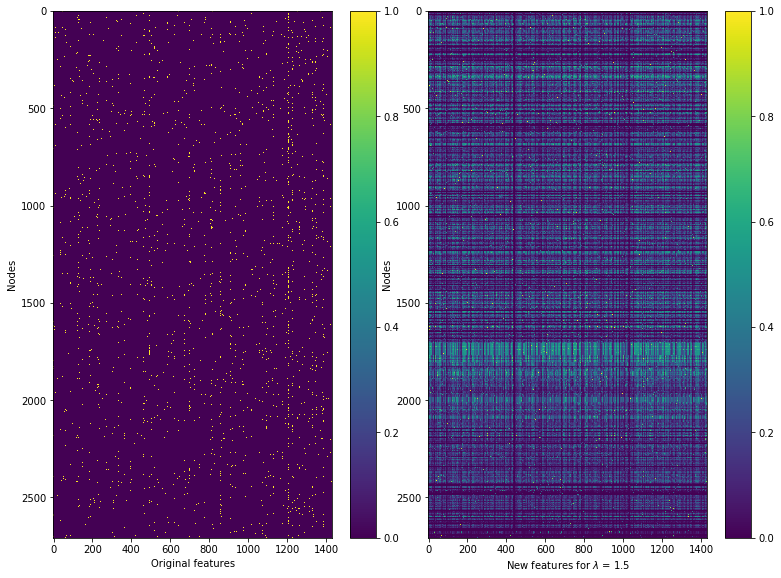

In [7]:
#############################################################################################################
# Show heatmap of features for various LAMBDA
#############################################################################################################
# LAMBDA -> 0         => all nodes have same features as originally
# LAMBDA = np.inf     => all nodes have same features
#############################################################################################################

LAMBDA = 1.5

from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = np.load('./../../../Dataset/Features/f_' + str(LAMBDA) + '_.npz')['X']
if LAMBDA != np.load('./../../../Dataset/Features/f_' + str(LAMBDA) + '_.npz')['LAMBDA']:
    raise ValueError("Lambdas don't agree!")
print "Max and Min feature value in new feature set:", np.max(X), np.min(X), X.shape

X = MinMaxScaler().fit_transform(X)

# In one plot
plt.figure(figsize=(10,7)) 
plt.subplot(1,2,1) 
plt.imshow(org_features, interpolation='none', cmap='viridis') 
plt.xlabel("Original features")
plt.ylabel("Nodes")

plt.colorbar()

plt.subplot(1,2,2) 
plt.imshow(X, interpolation='none', cmap='viridis') 
plt.xlabel("New features for $\lambda$ = " + str(LAMBDA))
plt.ylabel("Nodes") 
plt.colorbar()
plt.tight_layout(pad=-3.)
plt.show()

In [ ]:
# # Separate plots
# plt.figure(figsize=(20, 10)) 
# plt.imshow(org_features.T, interpolation='none', cmap='viridis') 
# # plt.yticks(range(30), cancer.feature_names) 
# plt.ylabel("Features")
# plt.xlabel("Nodes") 
# # plt.xlabel("Features")
# # plt.ylabel("Nodes") 
# plt.colorbar()
# # plt.matshow(org_features, cmap=plt.cm.hot)
# # plt.title("Pixel importances with forests of trees")
# plt.show()

# plt.figure(figsize=(20, 10)) 
# plt.imshow(X.T, interpolation='none', cmap='viridis') 
# # plt.yticks(range(30), cancer.feature_names) 
# plt.ylabel("Features")
# plt.xlabel("Nodes") 
# # plt.xlabel("Features")
# # plt.ylabel("Nodes") 
# plt.colorbar()
# # plt.matshow(org_features, cmap=plt.cm.hot)
# # plt.title("Pixel importances with forests of trees")
# plt.show()